<a href="https://colab.research.google.com/github/ritwiks9635/Data-Science-Project/blob/main/Consumer_Buying_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**💫Consumer Buying Behavior Analysis💫**

In [1]:
#https://www.kaggle.com/datasets/ imakash3011/customer-personality-analysis

## **Dataset Description**

**Attributes**
**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 year

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month


**Target**

Need to perform clustering & Apriori to summarize customer segments.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("/content/marketing_campaign.csv", sep = "\t")
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [33]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**We can see that the maximum income is much higher than the income at the 3rd quatile (almost 10 times greater). Also, the maximum amount spent on wines and meat products (i.e. MntWines, MntMeatProduct) are significantly greater than the one spent on other products.**

In [34]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## **Data Cleaning**

**we can see that two columns 'Z_CostContact' and 'Z_Revenue' which haven't been described by the data.**

In [35]:
df.drop(["Z_CostContact", "Z_Revenue"], axis = 1, inplace=True)

In [36]:
df.shape

(2240, 27)

###**Checking correlation between the attributes**

In [37]:
plt.rcParams.update(plt.rcParamsDefault)

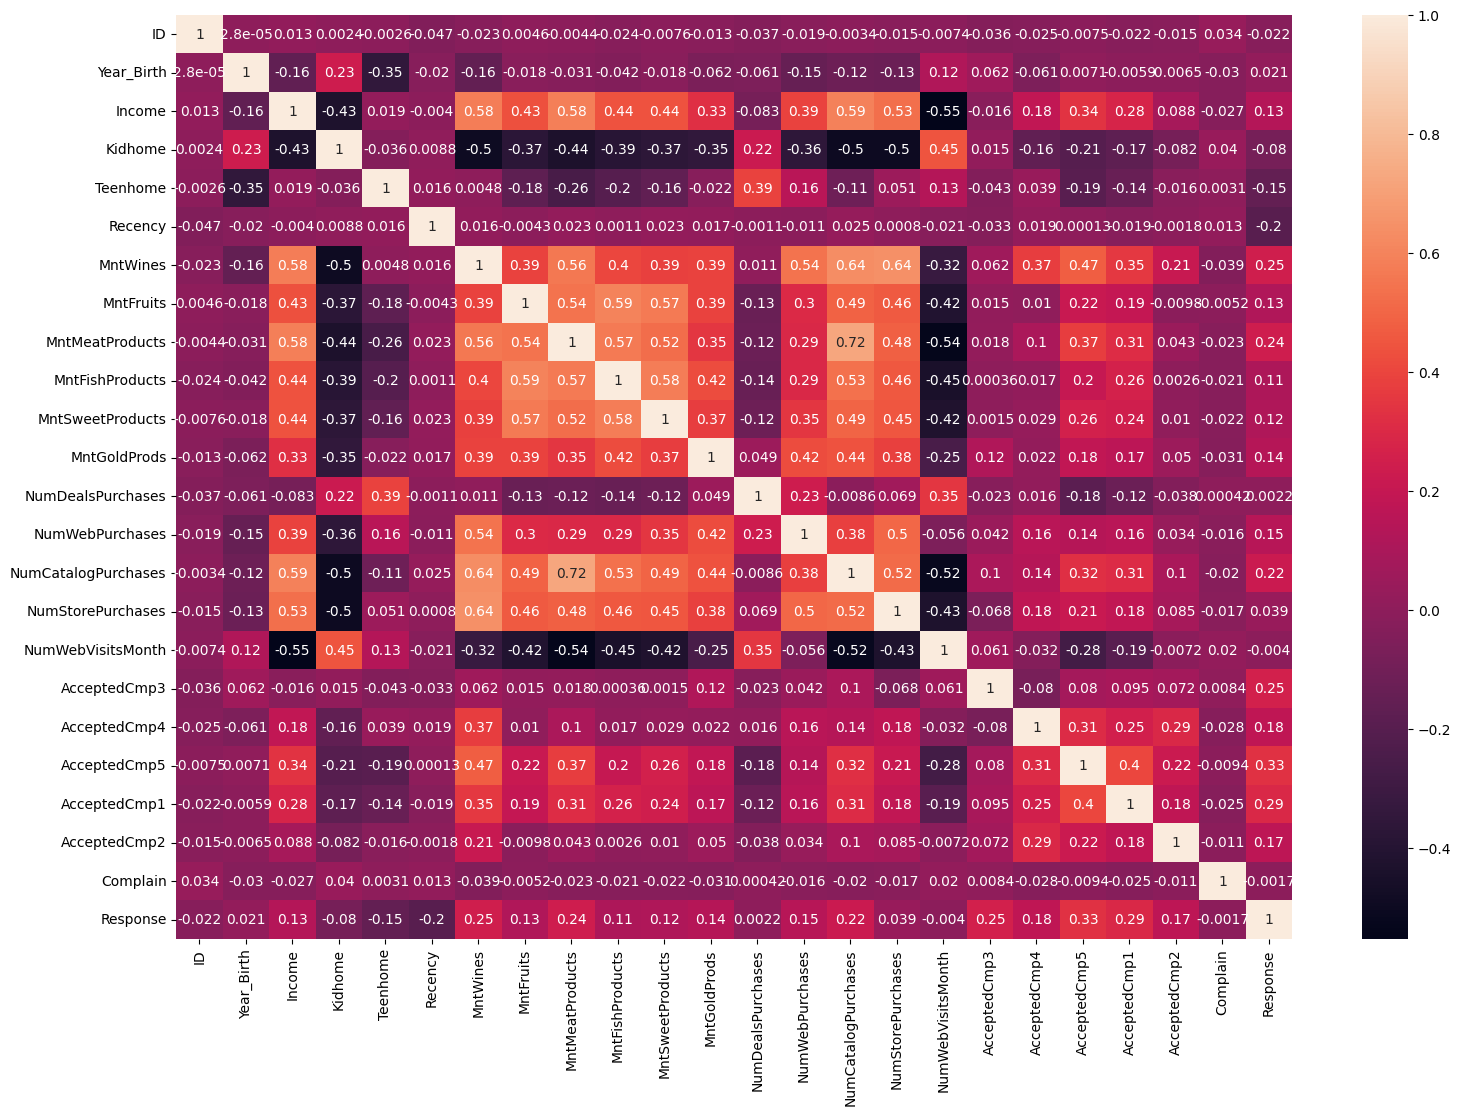

In [38]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(18, 12))
sns.heatmap(numerical_df.corr(), annot = True)
plt.show()


**No. two columns are too much correlated with each other so we can't drop any column on the basis of correlation.**

**Checking for correlation by unstacking data**

##**It is used to calculate how one variable is correlated/ dependent on other variable.**

Extreme values signify high correlation. Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

In [39]:
corr_data = numerical_df.corr()

corr_data.abs().unstack().sort_values(ascending=False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

**Filling the missing value in the income my mean**

In [40]:
df["Income"] = df["Income"].fillna(df["Income"].mean())
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##**Preprocessing DataFrame**

**Checking number of unique categories present in the "Marital_Status"**

In [41]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


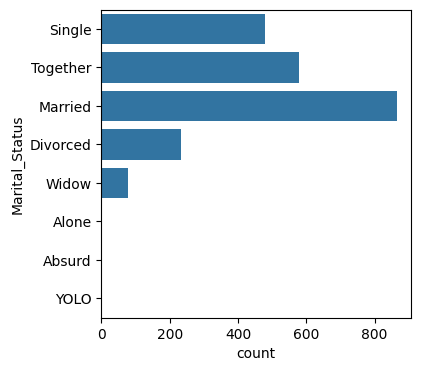

In [42]:
plt.figure(figsize=(4, 4))
sns.countplot(df["Marital_Status"])
plt.show()

**In the above cell we are grouping 'Married', 'Together' as "relationship", Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"**

In [43]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [44]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


**Separating Products to different Dataframe for Association Rule Mining**

In [45]:
product_data = []
for i in range(0, len(df)):
    productdata = [df['MntWines'][i], df['MntFruits'][i],
                  df['MntMeatProducts'][i], df['MntFishProducts'][i],
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
    product_data.append(productdata)
Products_df = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_df.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


**Combining different dataframe into a single column to reduce the number of dimension**

In [46]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [47]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [48]:
df['Age'] = 2015 - df["Year_Birth"]

**Now Education Value counts**

In [49]:
df["Education"].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


Changing category into UG and PG only

In [50]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [51]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,5524,1957,PG,Single,58138.0,04-09-2012,58,0,0,1617,1,25,58
1,2174,1954,PG,Single,46344.0,08-03-2014,38,0,2,27,0,6,61
2,4141,1965,PG,relationship,71613.0,21-08-2013,26,0,0,776,0,21,50
3,6182,1984,PG,relationship,26646.0,10-02-2014,26,0,1,53,0,8,31
4,5324,1981,PG,relationship,58293.0,19-01-2014,94,0,1,422,0,19,34


Number of days a customer was engaged with company

**Changing Dt_customer into timestamp format**

In [52]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y') # Change the format string to match the actual date format
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day, format='%d-%m-%Y') # Apply the same format change to 'first_day' for consistency
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [53]:
df=df.drop(columns=["ID", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [54]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,58138.0,0,1617,1,25,58,849
1,PG,Single,46344.0,2,27,0,6,61,299
2,PG,relationship,71613.0,0,776,0,21,50,498
3,PG,relationship,26646.0,1,53,0,8,31,325
4,PG,relationship,58293.0,1,422,0,19,34,347



##**VISUALIZATION**

Then, let's look at the categorical distributions of education level and the marital status of the customers. We can see that majority of the customers have a graduation degree, and most of them are in relationship or married

ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES WITH RESPECT TO EDUCATION

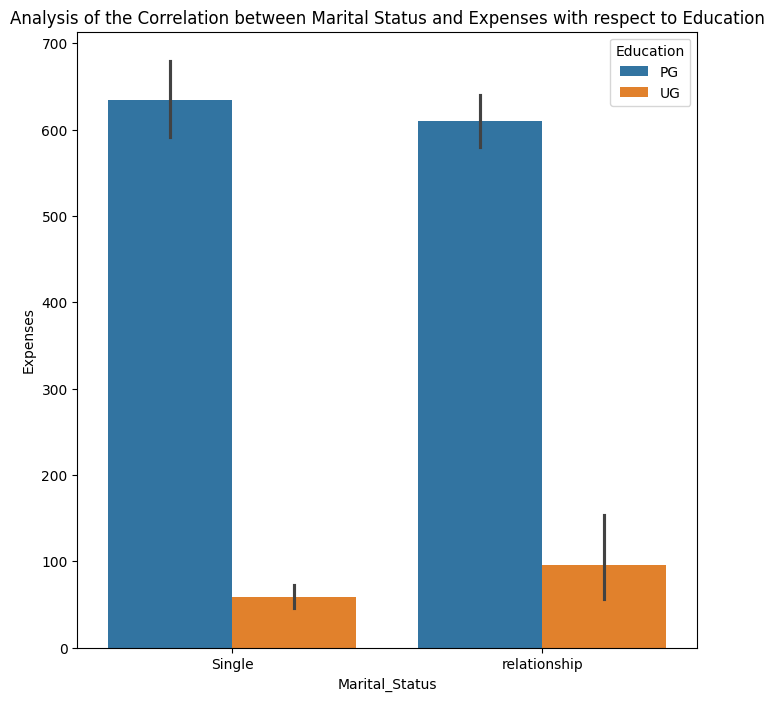

In [55]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES

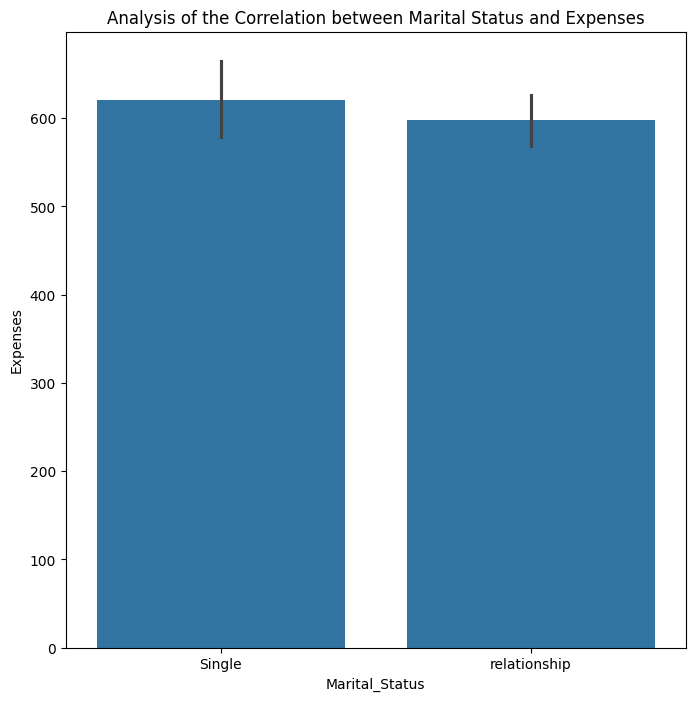

In [56]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'])
plt.title("Analysis of the Correlation between Marital Status and Expenses")
plt.show()

DISTRIBUTION OF EXPENSES WITH RESPECT TO MARITAL STATUS

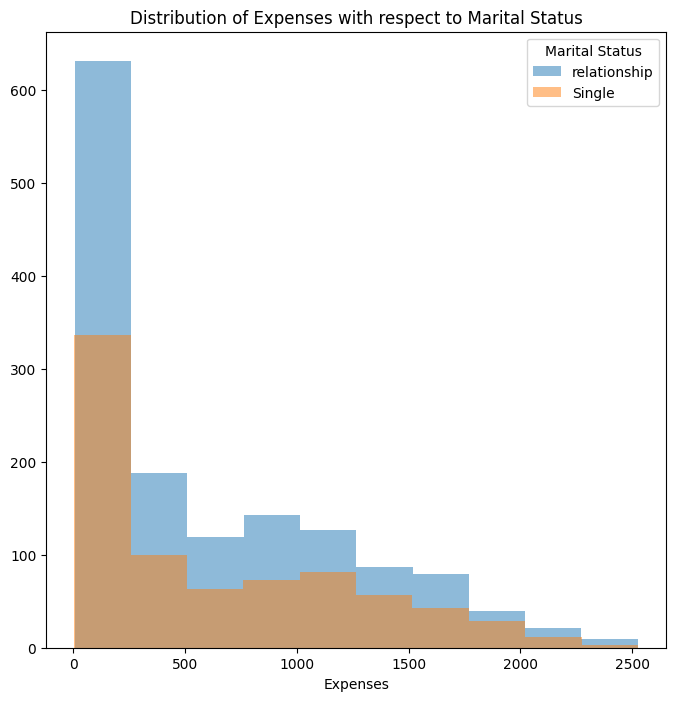

In [57]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

DISTRIBUTION OF EXPENSES WITH RESPECT TO EDUCATION

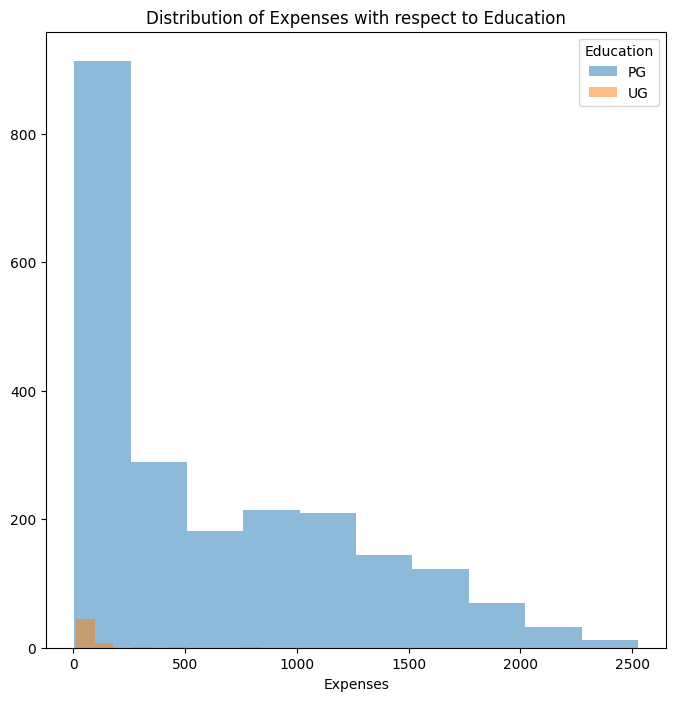

In [58]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

DISTRIBUTION OF NUMBER OF TOTAL EXPENSES WITH RESPECT TO EDUCATION

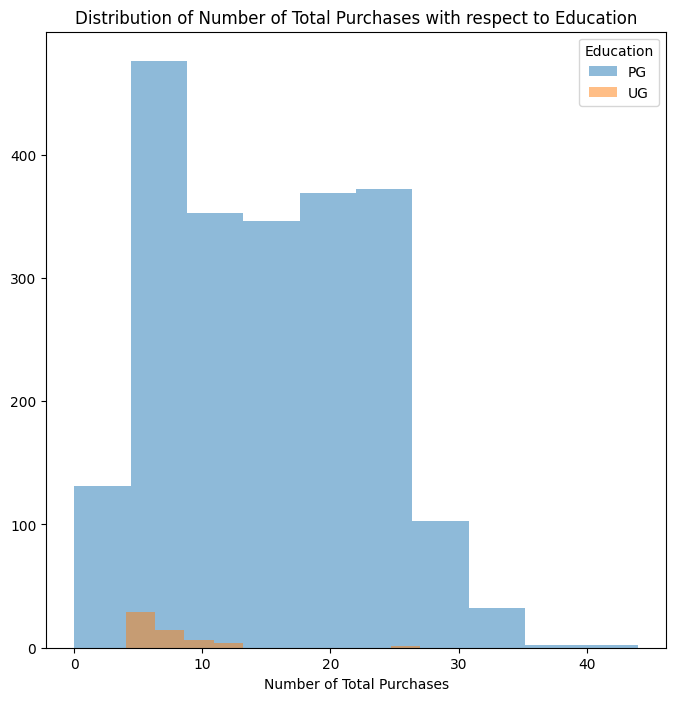

In [59]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

DISTRIBUTION OF AGE WITH RESPECT TO MARITAL STATUS

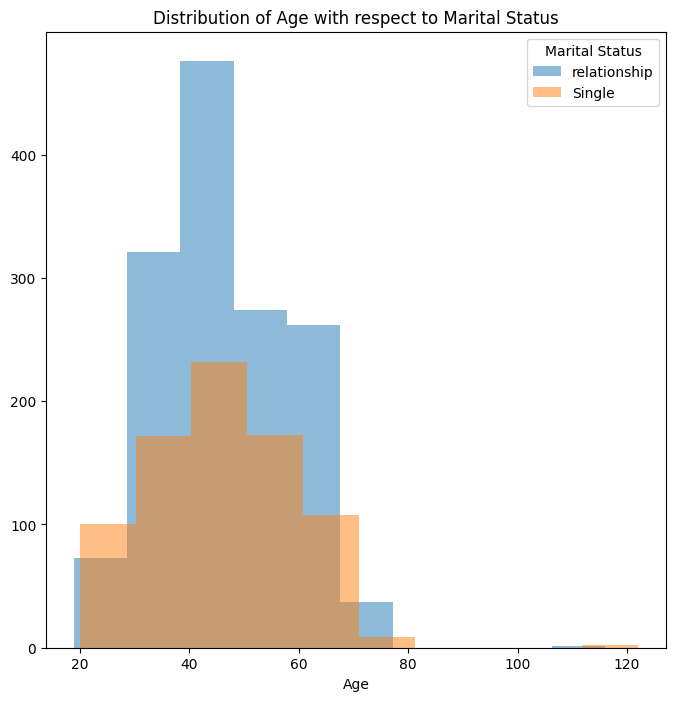

In [60]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

DISTRIBUTION OF INCOME WITH RESPECT TO MARITAL STATUS

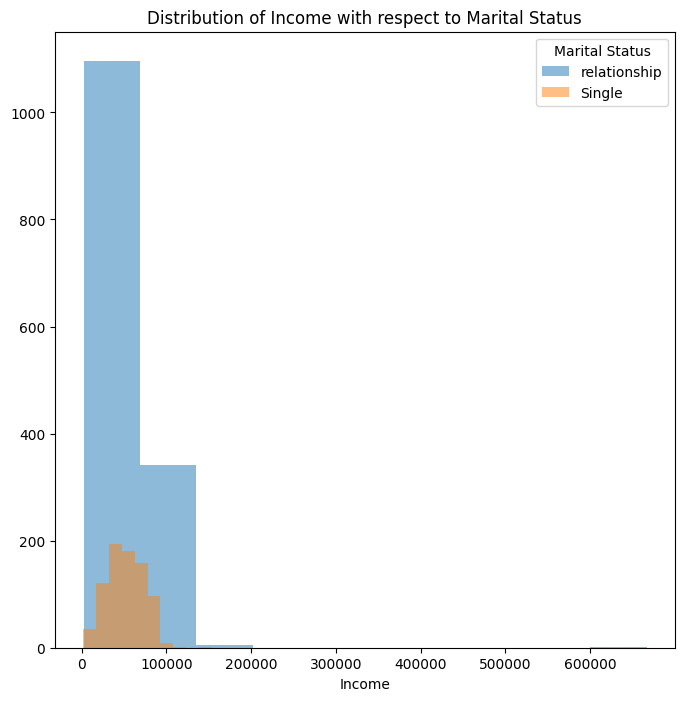

In [63]:
plt.figure(figsize=(8,8))
plt.hist("Income", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Income", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show()

ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO MARITAL STATUS

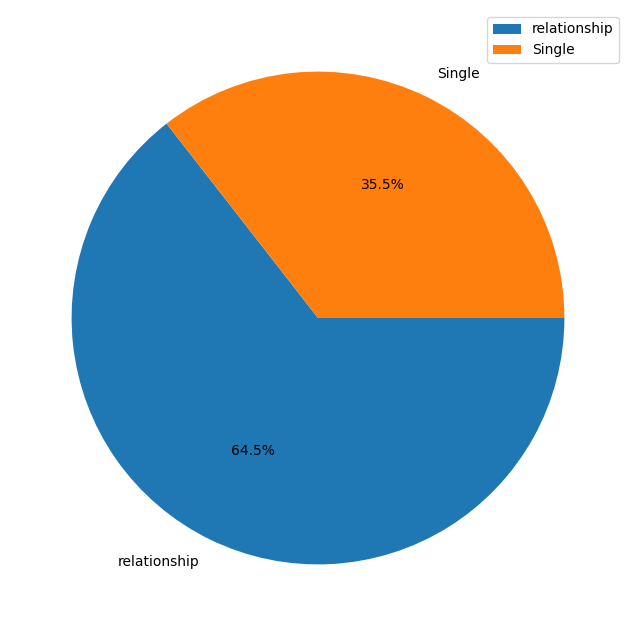

In [64]:
plt.figure(figsize=(8,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO EDUCATION

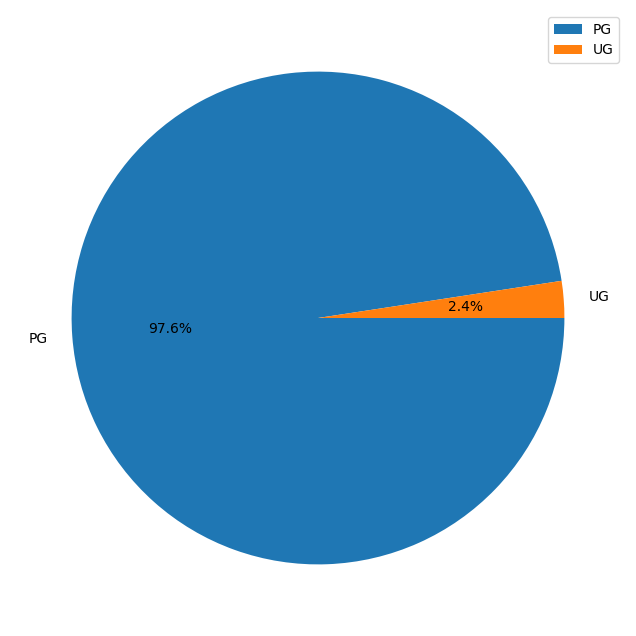

In [65]:
plt.figure(figsize=(8,8))
plt.pie(df["Education"].value_counts(), labels = ["PG", "UG"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

DISTRIBUTION OF EXPENSES BASED ON EDUCATION

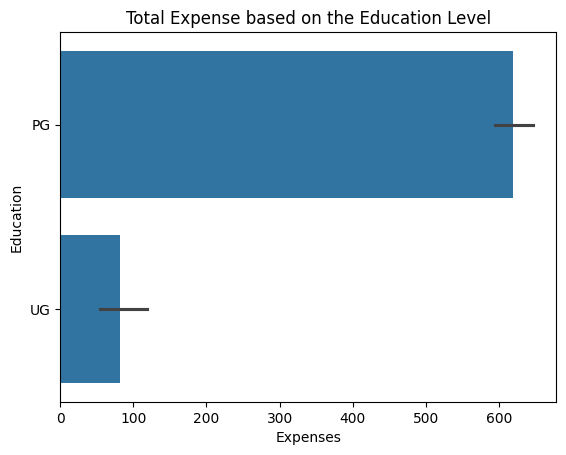

In [66]:
sns.barplot(x = df['Expenses'], y = df['Education'])
plt.title('Total Expense based on the Education Level')
plt.show()

INCOME BASED ON EDUCATION LEVEL

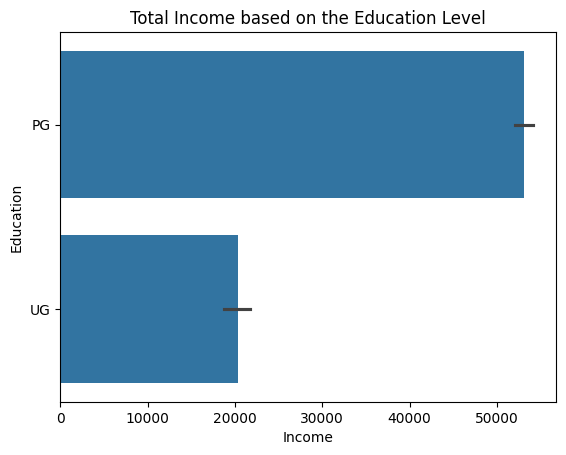

In [67]:
sns.barplot(x = df['Income'],y = df['Education'])
plt.title('Total Income based on the Education Level')
plt.show()

**LABEL ENCODING**

In [71]:
cat = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)


print(cat)

['Education', 'Marital_Status']


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat:
    df[i] = df[[i]].apply(le.fit_transform)

df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,58138.0,0,1617,1,25,58,849
1,0,0,46344.0,2,27,0,6,61,299
2,0,1,71613.0,0,776,0,21,50,498
3,0,1,26646.0,1,53,0,8,31,325
4,0,1,58293.0,1,422,0,19,34,347


In [73]:
df_c = df.copy()

**OUTLIERS DETECTION**

In [74]:
df_c.describe()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.024107,0.644643,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,0.153416,0.478728,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,0.000000,0.000000,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,0.000000,0.000000,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,0.000000,1.000000,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,0.000000,1.000000,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,1.000000,1.000000,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


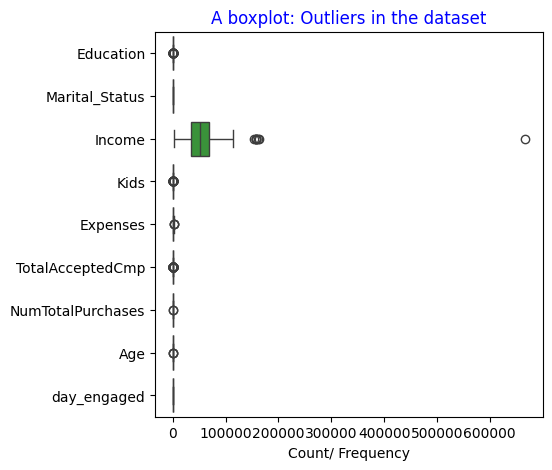

In [75]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df_c , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [76]:
from math import sqrt
# Drop Outliers
q3 = df_c.quantile(0.75)
q1 = df_c.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df_c = df_c[~( (df_c < lower_range)|(df_c > upper_range) ).any(axis=1)]

**K-MEANS CLUSTERING**

In [79]:
from sklearn.cluster import KMeans

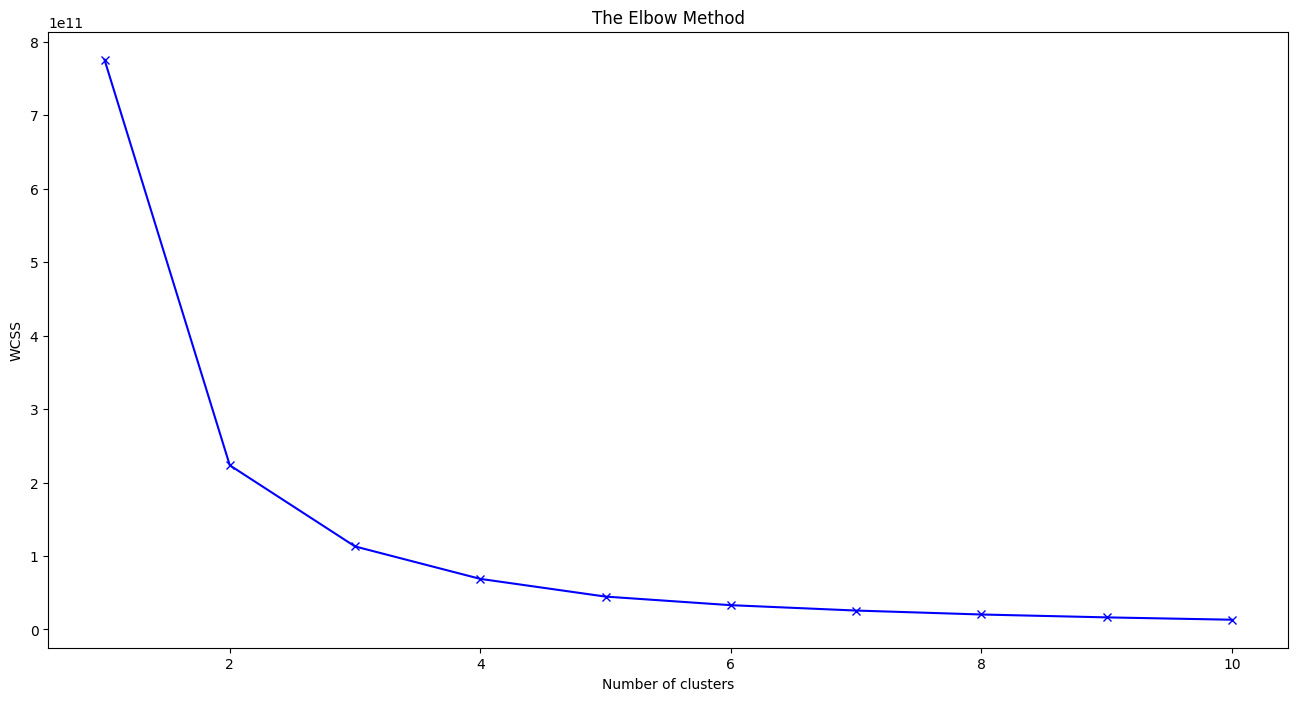

In [80]:
wcss=[] ##Initializing the list for the values of WCSS
for i in range (1,11): #for diferent values of k ranging from 1 to 10
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(df_c)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As it is not very clear from the elbow method that which value of K to choose.

**Silhouette Score**

In [81]:
from sklearn.metrics import silhouette_score

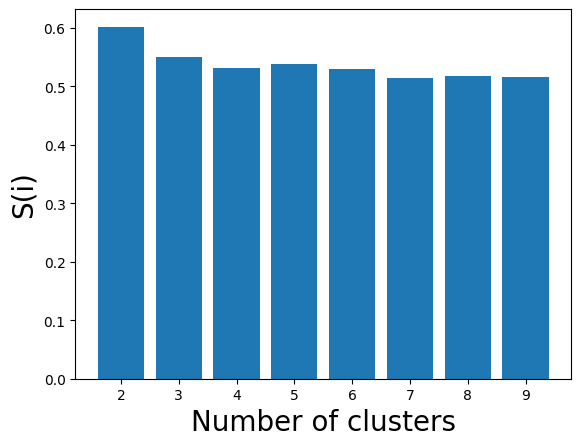

In [82]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df_c)
    silhouette_scores.append(silhouette_score(df_c, m1.fit_predict(df_c)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Here we are using Silhouette score to measure the value of K

In [83]:
silhouette_scores

[0.6020196261162176,
 0.5507943911857252,
 0.5306902010312631,
 0.5382176145209517,
 0.5289867659119167,
 0.5144769699835208,
 0.5173946117722902,
 0.5155965446319573]

In [87]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [89]:
kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df_c)
pred=kmeans.predict(df_c)

df_c['cluster'] = pred + 1

In [91]:
df_c.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,849,1
1,0,0,46344.0,2,27,0,6,61,299,2
2,0,1,71613.0,0,776,0,21,50,498,1
3,0,1,26646.0,1,53,0,8,31,325,2
4,0,1,58293.0,1,422,0,19,34,347,1


In [92]:
df_c['cluster'].value_counts()

,count
cluster,
1,1019
2,1003


we can see here that weightage of customer are more in cluster 1 as compare to other.

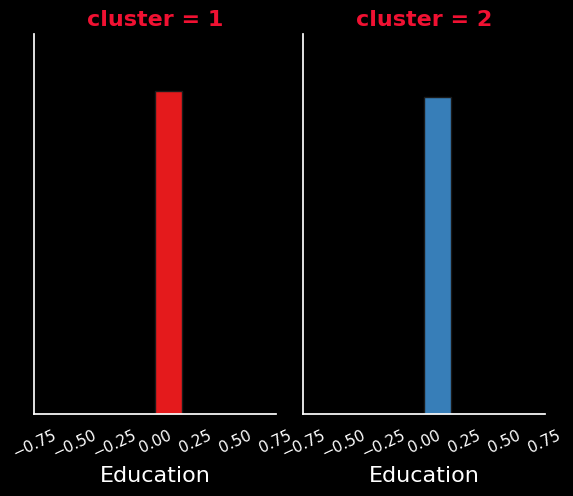

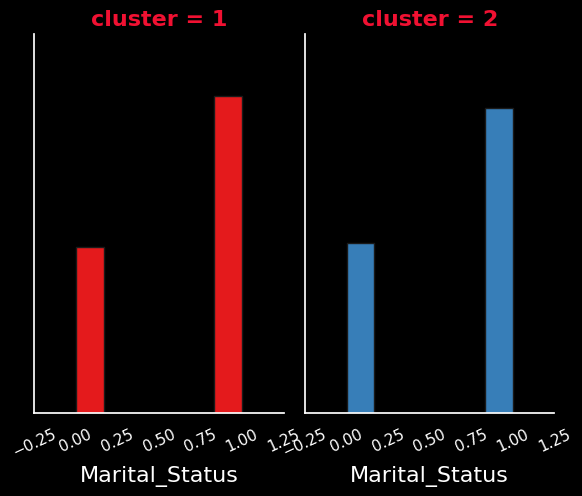

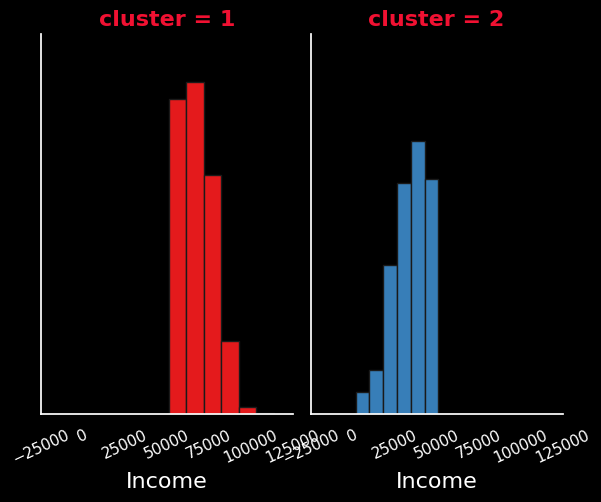

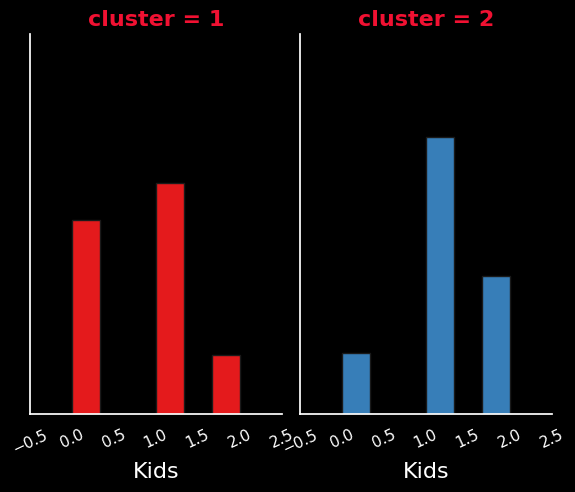

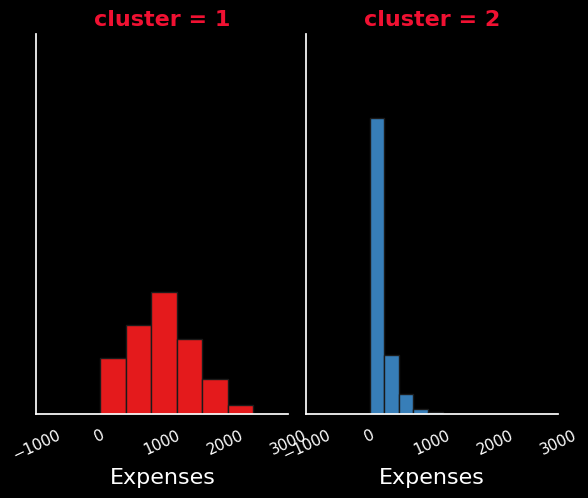

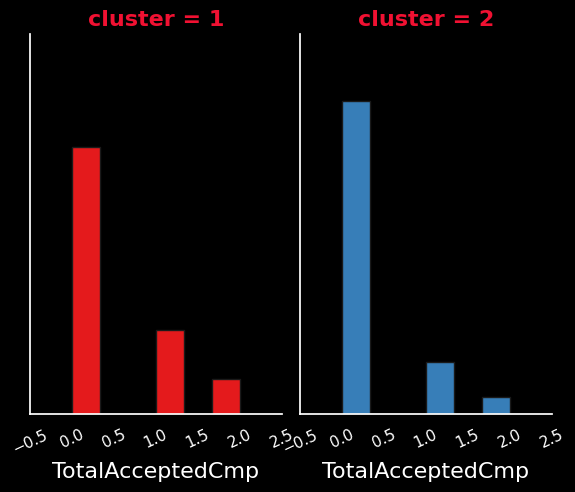

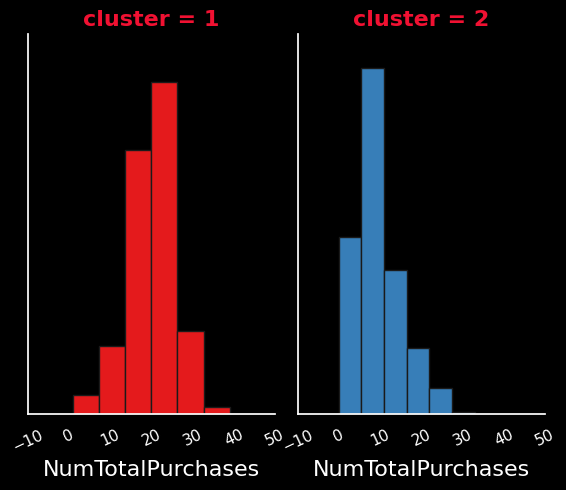

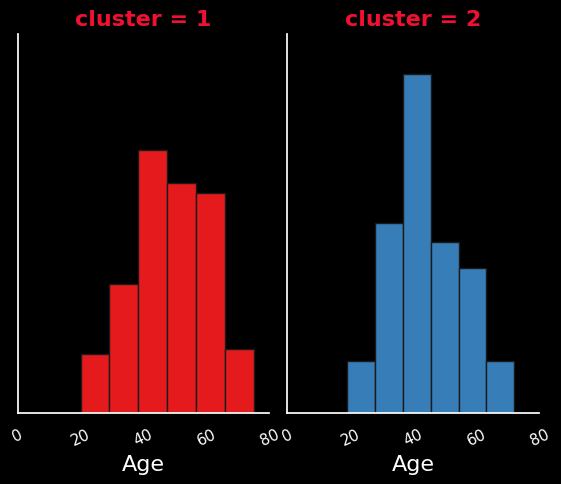

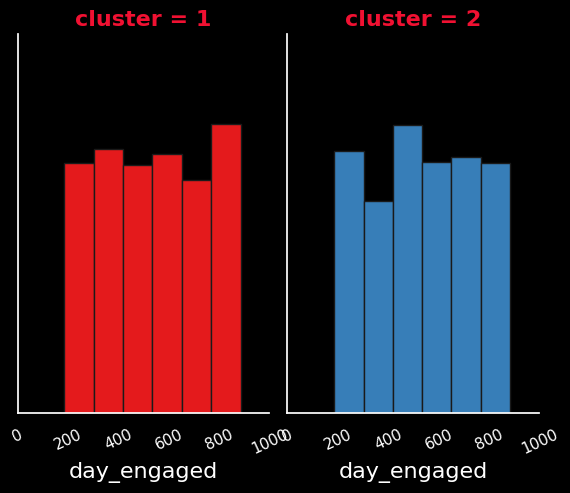

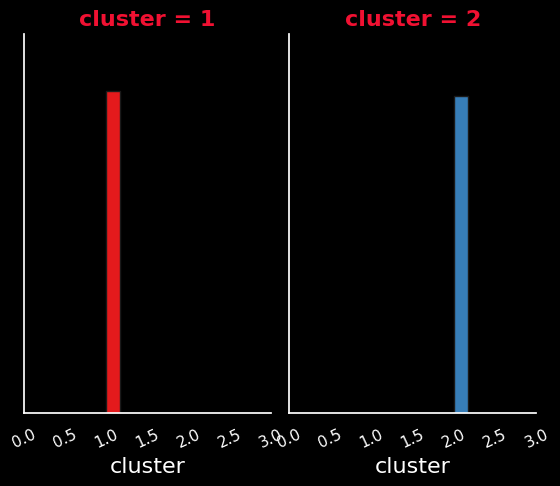

In [95]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_c:
    diag = sns.FacetGrid(df_c, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

plt.show()


##**Based on above information we can divide customer into 2 parts:-**
**Highly Active Customer :-**
 These customers belong to cluster one.

**Least Active Customer :-**
 These customers belong to cluster two.

##**1.Characteristics of Highly Active Customer**
**In terms of Education**

Highly Active Customer are from PG background

**In terms of Marital_status**

Number of people in relationship are approx. two times of single people

**In terms of Income**

Income of Highly active customer are little less as compare to least active customer.

**In terms of Kids**

Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).

**In terms of Expenses**

Expenses of Highly Active customer are less as compare to least. These customer spent avg. of approx. 100-200 unit money.

**In terms of Age**

Age of these customer are between 25 to 75. Maximum customer age are between 40 to 50.

**In terms of day_engaged**

Highly Active customer are more loyal as they engaged with company for longer period of time.

##**2.Characteristics of Least Active Customer**
**In terms of Education**

Least Active Customer are from UG backgroud

**In terms of Marital_status**

Number of people in relationship are approx. equal to single people

**In terms of Income**

Income of Least active customer are very less or say negligible.

**In terms of Kids**

Only few of these customer have child.

**In terms of Expenses**

Expenses of Least Active customer are very less or say negligible.

**In terms of Age**

Age of these customer are between 15 to 30.

**In terms of day_engaged**

Least Active customer are not much enrolled with company for longer time

In [96]:
PLOT = go.Figure()
for C in list(df_c.cluster.unique()):


    PLOT.add_trace(go.Scatter3d(x = df_c[df_c.cluster == C]['Income'],
                                y = df_c[df_c.cluster == C]['Age'],
                                z = df_c[df_c.cluster == C]['day_engaged'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Days Engaged: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Days Engaged', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

##**MODEL EVALUATION**

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, pred))
print("classification report \n", classification_report(kmeans.labels_, pred))

ConfusionMatrix 
 [[1019    0]
 [   0 1003]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      2022
   macro avg       1.00      1.00      1.00      2022
weighted avg       1.00      1.00      1.00      2022




##**ASSOCIATION RULE MINING: APRIORI ALGORITHM**

Association Rule Mining is used when we want to find an association between different objects in a set, find frequent patterns in a transaction database.


The Apriori algorithm is the simplest technique to identify the underlying relationships between different types of elements.
Here we use this algorithm to find out which customers are best suited for a given item. Thereby helping businesses promote the right target customers to increase efficiency and save costs.

In [98]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=e4a238c609bd72b899f7917d36ce459cf0edbf30f3ba672ed1a35d730a9e515e
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [99]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

##**Data Preparation for Apriori Algorithm**

In [ ]:
data = df_c.copy()

In [ ]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create day engaged segment
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['dayengaged_group'] = pd.qcut(data['day_engaged'], q=4, labels=cut_labels_dayengaged)
data=data.drop(columns=['Age','Income','day_engaged'])


Defining new segments according to the spending of customers on each product which will be based on:

Cluster 1 - Highly Active Customer

Cluster 2 - Least Active Customer

In [ ]:
cut_labels = ['Least Active Customer', 'Highly Active Customer']
data['Wines_segment'] = pd.qcut(Products_df['Wines'][Products_df['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(Products_df['Fruits'][Products_df['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(Products_df['Meat'][Products_df['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(Products_df['Fish'][Products_df['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(Products_df['Sweets'][Products_df['Sweets']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(Products_df['Gold'][Products_df['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Inactive Customer",inplace=True)
data = data.astype(object)

In [106]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,0,0,1617,1,25,1,Mature,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,0,2,27,0,6,2,Mature,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,1,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,1,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,0,1,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

In [ ]:
association = data.copy()

In [110]:
association.drop(["Education", "Marital_Status", "Kids", "Expenses", "TotalAcceptedCmp", "NumTotalPurchases", "cluster"], axis = 1, inplace = True)
association.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Mature,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,Mature,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


##Setting the Association Rules

In [ ]:
df_ap = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

**Finding the "Highly Active Customers" when it comes to "Wine"**

In [112]:
product='Wines'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5874,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Age_group_Mature)",(Wines_segment_Highly Active Customer),0.102,0.497,0.101,0.986,1.983,0.050,34.705,0.552
8747,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Age_group_Mature, Fish_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.093,0.497,0.092,0.984,1.980,0.046,31.687,0.546
8809,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Age_group_Mature, Sweets_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.090,0.497,0.088,0.983,1.979,0.044,30.346,0.543
6025,"(Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income, Gold_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.085,0.497,0.084,0.983,1.977,0.041,28.837,0.540
10424,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Age_group_Mature, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.083,0.497,0.082,0.982,1.976,0.040,28.166,0.539


**Finding the "Highly Active Customers" when it comes to "Fruits"**

In [113]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6146,"(Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income, Gold_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.085,0.394,0.080,0.942,2.393,0.047,10.429,0.636
10426,"(Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Age_group_Mature, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.087,0.394,0.082,0.938,2.381,0.047,9.701,0.635
9493,"(Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.169,0.394,0.158,0.936,2.377,0.092,9.426,0.697
10678,"(Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.153,0.394,0.143,0.935,2.376,0.083,9.398,0.684
9555,"(Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.161,0.394,0.150,0.935,2.376,0.087,9.384,0.690


**Finding the "Highly Active Customers" when it comes to "Meat"**

In [114]:
product='Meat'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10677,"(Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.143,0.496,0.143,1.000,2.016,0.072,inf,0.588
5875,"(Fruits_segment_Highly Active Customer, Income_group_High income, Wines_segment_Highly Active Customer, Age_group_Mature)",(Meat_segment_Highly Active Customer),0.101,0.496,0.101,1.000,2.016,0.051,inf,0.561
6715,"(Fruits_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.184,0.496,0.184,1.000,2.016,0.093,inf,0.618
6745,"(Fruits_segment_Highly Active Customer, Income_group_High income, Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.167,0.496,0.167,1.000,2.016,0.084,inf,0.605
8315,"(Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Age_group_Adult, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.080,0.496,0.080,1.000,2.016,0.040,inf,0.548


**Finding the "Highly Active Customers" when it comes to "Fish"**

In [115]:
product='Fish'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6953,"(Income_group_High income, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.161,0.404,0.154,0.954,2.361,0.089,12.952,0.687
10673,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.150,0.404,0.143,0.954,2.361,0.083,12.941,0.678
9613,"(Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.150,0.404,0.143,0.954,2.361,0.083,12.941,0.678
9675,"(Meat_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.161,0.404,0.153,0.954,2.361,0.088,12.912,0.687
3249,"(Income_group_High income, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.169,0.404,0.160,0.947,2.344,0.092,11.290,0.690


**Finding the "Highly Active Customers" when it comes to "Sweets"**

In [116]:
product='Sweets'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3250,"(Income_group_High income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.176,0.389,0.160,0.910,2.338,0.091,6.776,0.694
7074,"(Fruits_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.164,0.389,0.149,0.909,2.336,0.085,6.739,0.684
7104,"(Meat_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.174,0.389,0.158,0.909,2.336,0.091,6.719,0.692
9738,"(Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.163,0.389,0.148,0.909,2.335,0.085,6.698,0.683
6954,"(Income_group_High income, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.170,0.389,0.154,0.907,2.330,0.088,6.547,0.687



##**Association Rule Mining**

In this way, if we can find the Biggest Consumers for a particular product, multiple ways of market these products can be narrowed down to these customers and their needs.

Thus, Apriori Algorithm will help the businesses to plan appropriate Product Pricings, making better decisions on Product Positioning and helping the business owner to work on product assortment and availability of different category of products, all based on the needs of these Highly Active Customers.


##**CLASSIFICATION: LOGISTIC REGRESSION**

To determine whether customers will purchase the company’s product or not?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dfc_c=df_c.copy()
x = dfc_c.drop('cluster', axis=1)
y = dfc_c['cluster']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

In [ ]:
y_pred = log_reg.predict(x_test)

##**MODEL EVALUATION**

In [123]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       201
           2       0.99      1.00      0.99       204

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9925925925925926
----------------------------------------------------------------------------------------------------

F1 Score:  0.9925187032418954
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


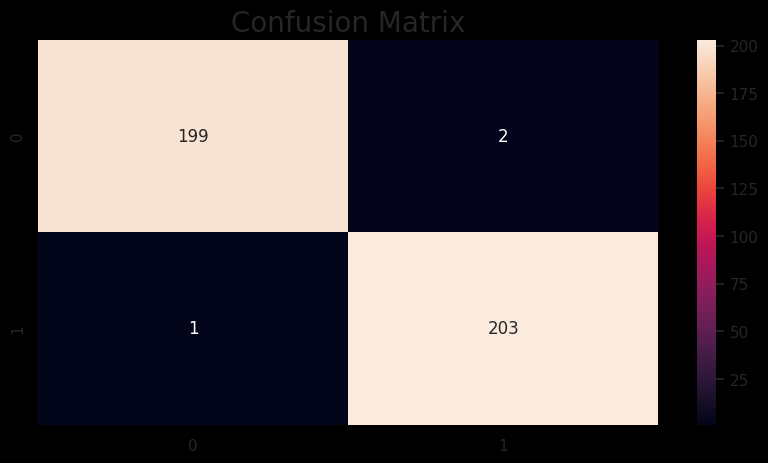

In [124]:
print("Classification Report: \n", classification_report(y_test,y_pred))
print("-" * 100)
print()

acc = accuracy_score(y_test, y_pred)

print("Accuracy Score: ", acc)
print("-" * 100)
print()

f1 = f1_score(y_test, y_pred)

print("F1 Score: ", f1)
print("-" * 100)
print()

print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
plt.show()

From, the above confusion matrix, it can be seen that Logistic Regression predicted only 3 incorrect values but rest all values were predicted correctly that means that the Logistic Regression classifier did perform reasonably well.